# David Burton's Zombie Invasion

# Theory Overview

Modeling a zombie invasion involves the use of population dynamics and disease dynamics. Every disease and population dynamic equation is a first order differential equation, so an equation is necessary to integrate the differential equations forward- **Euler-Richardson**, which uses the midpoint slope to estimate the next point:
$$t_{n+1/2}=t_{n}+\frac{\Delta t}{2}$$
$$x_{n+1/2}=x_{n}+f(t_{n},x_{n})\frac{\Delta t}{2}$$
$$f_{midpoint}=f(t_{n+1/2},x_{n+1/2})$$
$$x_{n+1}=f_{midpoint}\Delta t+x_{n}$$
<br>
<br>
The **disease dynamics** are modeled with three seperate differential equations: Susceptible, Infected, and Recovered.
For the below equations,
$S$ is the susceptible population,
$I$ is the infected population, 
$N$ is the total population,
$\beta$ is the rate of infection, and
$\gamma$ is the rate of recovery.
<br>
<br>
The rate of people becoming **susceptible** to an infection is calculated with the following:
$$\frac{dS}{dt}= -\frac{\beta IS}{N}$$
<br>
<br>
The rate of people becoming **infected** is calculated with the following:
$$\frac{dI}{dt}= \frac{\beta IS}{N} -\gamma I$$
<br>
<br>
The rate of people **recovering** to an infection is calculated with the following:
$$\frac{dR}{dt}= \gamma I$$
<br>
<br>
The **population dynamics** are modeled with three different equations:
<br>
<br>
The rate at which **one species changes over time without a carrying capacity** is calculated with the following:
$$\frac{dx}{dt}= rx$$
<br>
In the above equation, $r$ is the birth rate minus the death rate, and $x$ is the population.
<br>
<br>
The rate at which **one species changes over time with a carrying capacity** is calculated with the following:
$$\frac{dx}{dt}= rx(1-\frac{x}{K})$$
<br>
In the above equation, $r$ is the birth rate minus the death rate, $x$ is the population, and $K$ is the carrying capacity.
<br>
<br>
The rate at which **two species interact over time** is calculated with the following equations:
$$\frac{dx}{dt}= \alpha x-\beta xy$$ $$\frac{dy}{dt}= \delta xy-\gamma y $$
<br>
In the above equation, $x$ is the prey population, $y$ is the predator population, $\alpha$ is teh birth rat eminus the death rate of prey species, $\beta$ is the rate at which predator catches prey, $\delta$ is the conversion of prey to predator, and $\gamma$ is the death rate of the predator species.
<br>

# Program Implementation

These are the functions that I am importing to use in solvign the problems.

In [1]:
from pylab import array,sqrt, scatter, show, title, xlabel, ylabel, plot, legend
from random import randint
%matplotlib inline

**These are my functions for modeling the population dynamics of a zombie invasion.**

**eurich** is my Euler-Richardson function that is used to integrate a function (f) that contains a variable (x) and a current time (t) forward in time by a specific change in time (dt). Eurich returns an output of the new variable x at a time that is some change in time (dt) forward from the current time (t).

In [2]:
#euler richardson function
def eurich(f,x,pack,t,dt):
    #pack is our fudge factor so that all functions have the same input format when passed to eurich
    tm=t+(dt/2) #calculatign the midpoint time
    xm=x+f(x,pack,t)*(dt/2) #calculatign the midpoint position
    fm=f(xm,pack,tm) #calculatign the midpoint slopes
    return x+fm*dt #calculatign the final xposition as estimated by the slope at the midpoint

**A Note on Formatting of Functions**
<br>
Since all the functions will return a derivative of something, the input format will be something, tuple of modifiers and other stuff, and the current time, and the output will always be the derivative of that something.

**rate-susp** is my rate of suspetibility function, which is based off of the following population dynamic equation:$$\frac{dS}{dt}= -\frac{\beta IS}{N}$$ It takes in beta (the rate of infection), I (the infected population), S (the susceptible population), and N (the total population) as inputs, and it returns as an output the rate of change in the susceptible population.

In [3]:
def rate_susp(S,pak,t):
    beta,I,N=pak
    return -(beta*I*S)/N

For example, if the rate of infection (beta) is 0.03, the infected population (I) is 100, the susceptible population is 25, and the total population is 150, then the rate of change in the susceptible population will be:

In [4]:
#Our Inputs
I_rate=0.03 #the infection rate
I_pop=100 #the infected population
S_pop=25 #the susceptible population
N_pop=150 #the total population

package=(I_rate,I_pop,N_pop) #packaging the nonstandard inputs into a tuple

time=0 #starting time is zero

print(rate_susp(S_pop,package,time)) #printing the output

-0.5


**rate_infected** is my rate of infection function, which is based off of the following population dynamic equation: $$\frac{dI}{dt}= \frac{\beta IS}{N} -\gamma I$$ It takes in beta (the rate of infection), I (the infected population), S (the susceptible population), N (the total population), gamma (the rate at which people recover) as inputs, and it returns as an output the rate at which people become infected.

In [5]:
def rate_infected(I,pak,t):
    beta,S,N,gamma=pak
    return ((beta*I*S)/N)-(gamma*I)

For example, if the rate of infection (beta) is 0.03, the infected population (I) is 100, the susceptible population is 25, the total population is 150, and the recovery rate (gamma) is 0.001, then the rate of change in the infected population will be:

In [6]:
#Our Inputs
I_rate=0.03 #the infection rate
I_pop=100 #the infected population
S_pop=25 #the susceptible population
N_pop=150 #the total population
Rec_rate=0.001 #teh recovery rate

package=(I_rate,S_pop,N_pop,Rec_rate) #packaging the nonstandard inputs into a tuple

time=0 #starting time is zero
print(rate_infected(I_pop,package,time)) #printing the output

0.4


**rate_recovery** is my rate of recovery function, which is based off of the following population dynamic equation:
 $$\frac{dR}{dt}= \gamma I$$ It takes in I (the infected population) and gamma (the rate at which people recover) as inputs, and it returns as an output the rate at which people recover.

In [7]:
def rate_recovery(R,pak,t):
    I,gamma=pak
    return gamma*I

For example, if infected population (I) is 100 and the recovery rate (gamma) is 0.001, then the rate at which people recover will be:

In [8]:
#Our Inputs
R_pop=0 #the reovered population
I_pop=100 #the infected population
Rec_rate=0.001 #the recovery rate

package=(I_pop,Rec_rate) #packagign nonstandard variables

time=0

print(rate_recovery(R_pop,package,time)) #printing the output

0.1


**pop_change_1sp** is my rate of population change for one species function without a carrying capacity, which is based off of the following population dynamic equation: $$\frac{dx}{dt}= rx$$ It takes in r (the birth rate minus the death rate) and x (the population), then it returns as an output the rate at which the population changes.

In [9]:
def pop_change_1sp(x,pak,t):
    r=pak
    return r*x

For example, if the birth rate is 0.5, the death rate is 0.15 and the population (pop) is 125, then the population change will be:

In [10]:
#Our Inputs
BD=0.5-0.15 #the birth rate minus teh death rate
pop=125 #the population

package=(BD) #packagign nonstandard variables

time=0

print(pop_change_1sp(pop,package,time)) #printing the output

43.75


**pop_change_1spK** is my rate of population change for one species function with a carrying capacity, which is based off of the following population dynamic equation: $$\frac{dx}{dt}= rx(1-\frac{x}{K})$$ It takes in r (the birth rate minus the death rate), x (the population), and K (the carrying capacity), and it returns as an output the rate at which the population changes.

In [11]:
def pop_change_1spK(x,pak,t):
    r,K=pak
    return r*x*(1-(x/K))

For example, if the birth rate is 0.5, the death rate is 0.15, the population (pop) is 125, and the carrying capacity is 150, then the population change will be:

In [12]:
#Our Inputs
BD=0.5-0.15 #the birth rate minus teh death rate
pop=125 #the population
C_cap=150 #teh carrying capacity

package=(BD,C_cap) #packagign the nonstandard inputs
time=0
print(pop_change_1spK(pop,package,time)) #printing the output

7.291666666666665


**pop_change_2sp_xout** and **pop_change_2sp_yout** are my predator-prey population interactions functions, which are based off of the population dynamic equations: $$\frac{dx}{dt}= \alpha x-\beta xy$$ $$\frac{dy}{dt}= \delta xy-\gamma y $$It takes alpha (the birth rate minus the death rate for the prey species-x), beta (the success rate of how often the predator species-y gets its prey species-x), delta (the rate that predator can convetr prey into more predator), gamma (the death rate of teh predator species-y), x (the population of the prey species), and y (the population of the predator species)as inputs. They returns as an output the rate at which population x and population y change respectively.

In [13]:
def pop_change_2sp_xout(x,pak,t):
    alpha,beta,delta,gamma,y=pak
    change_x=(alpha*x)-(beta*x*y)
    return change_x

def pop_change_2sp_yout(y,pak,t):
    alpha,beta,delta,gamma,x=pak
    change_y=(delta*x*y)-(gamma*y)
    return change_y

For example, if birth minus the death rate of the prey species (BD) is 0.5, the success rate of predator species catchign prey species (catch) is 0.01, the rate of predator species converting prey into more predators (conv) is 0.001, the death rate of the predator species (pred_dth) is 0.1, the population of prey species (prey) is 125, and the population of the predator species (pred) is 25, then the rate of change of each population will be:

In [14]:
#Our Inputs
BD=0.5 #birth rate minus death rate of prey species
catch=0.01 #rate that predators catches prey
conv=0.001 #rate of converting prey into predator
pred_dth=0.1 #death rate of predators
prey=125 #prey population
pred=25 #predator population

package_x=(BD,catch,conv,pred_dth,pred) #packaging nonstandard inputs with regards to species x (the prey)
package_y=(BD,catch,conv,pred_dth,prey) #packaging nonstandard inputs with regards to species y (the predator)

print(pop_change_2sp_xout(prey,package_x,time)) #printing the output for rate of species x change
print(pop_change_2sp_yout(pred,package_y,time)) #printing the output for rate of species y change

31.25
0.625


**zombie_attack** is the zombie attack function which models moves everything forward in time to model the zombie invasion. As inputs, it takes the human population (x), fed zombie population (y), hungry zombie population (z), the startign time (t), the amount of time to move forward (ft), the increment to move forward with Euler-Richardson (dt), and the collection of packages for all functions used in zombie_attack (mega). zombie_attack works by settign the current_time to the start time (t), unpacking mega to get all the packages for each function, and then going through a while loop that moves the current_time forward by an increment of dt until the current_time is no longer less than or equal to the start time (t) plus the forward time (ft). Inside the while loop, the fed zombies first attack humans with eurich and pop_change_2sp, then the packages are updated, then fed zombies become hungry, hungry zombies then attack humans, their packages are updated, and then the current_time is moved forward by dt.
#edit this

In [15]:
#the function needs some work, because the fed zombie population doesn't increase as much as it should be

#Rehash this equation so that it uses the SIR Model
#in the SIR model, I describes fed zombies, S describes teh human population
#in the SIR model, then gamma describes the conversion of fed zombies to hungry zombeis
#in the SIR model, the deltaR/deltaT describes creation of hunrgy zombies
#SIR describes fed zombeis interacting with humans
#predator prey relationship describes hungry interacting with humans
#single population changes is for hungry death rate

def zombie_attack(x,y,z,t,ft,dt,mega):
    current_time=t
    
    #unpackign the medga package
    package_x1,package_x2,package_y,package_z1,package_z2=mega
    
    #intergrating forward in time until we have moved forward teh specified amount
    while current_time<=t+ft: 
        #we integrate forward as long at the current time is less than the start t+ft
        x_start=x
        x=eurich(pop_change_2sp_xout,x,package_x1,current_time,dt)
        #y=eurich(pop_change_2sp_yout,y,package_y,current_time,dt)
        change_x=abs(x-x_start)
        y+=change_x #the fed zombie population increases by how the human population changes
        
        #editing each package
        package_x1=list(package_x1)
        package_x1[-1]=y
        package_x1=tuple(package_x1)
        
        package_y=list(package_y)
        package_y[-1]=x
        package_y=tuple(package_y)
        
        #fed zombies population decreasing and hungry zombie population increasing
        y_start=y
        y_end=eurich(pop_change_1sp,y,-package_z1,current_time,dt)
        z+=abs(y_start-y_end) #the population of hungry zombies increases by the change in fed zombies
        y=y_end
        
        #package_z1 never needs to be edited, because that rate is constant
        
        #hungry zombies attackign humans
        x=eurich(pop_change_2sp_xout,x,package_x2,current_time,dt)
        z=eurich(pop_change_2sp_yout,z,package_z2,current_time,dt)
        
        #editing each package
        package_x2=list(package_x2)
        package_x2[-1]=z
        package_x2=tuple(package_x2)
        
        package_z2=list(package_z2)
        package_z2[-1]=x
        package_z2=tuple(package_z2)
        
        #moving forward in time
        current_time+=dt
    
    return (x,y,z)

For example,zombie_attack can find how many humans, fed zombies, and hungry zombies would exist after 50 units of time (start_time) with a time increment of 0.9 (increment_time). The human population (hpop) is 100, the fed zombie population (fed) is 1, and the hungry zombie population (hungry) is 0. The human population has no natural changes in population (h_BD), fed zombies catch humans (fed_catch) at a rate of 0.008, and every human caught is assumed to get converted to zombie (fed_conv). Fed zombies do not die (fed_dth). Hungry zombies catch humans (hungry_catch) at a rate of 0.003, humans do not get converted to hungry zombies (hungry_conv_h), and fed zombies convert to hungry zombies (hungry_conv_f) at a rate of 0.15. Hungry zombies die (hungry_dth) at a rate of 0.3. The individual packages for each equation and the mega package are made according to how packages were made in the above examples.
#edit this

In [16]:
#the time
start_time=0
forward_time=50
increment_time=0.9


#the populations
hpop=100
fed=1
hungry=0

#the rates
h_BD=0 #rate of change of human population
fed_catch=0.008 #rate at which fed zombies catch humans
fed_conv=1.0 #fed zombies always convert a human when they catch a human
fed_dth=0 #fed zombies don't die
hungry_catch=0.003 #rate at which hungry zombies catch humans
hungry_conv_h=0 #hunrgy eat humans, no humans get converted
hungry_conv_f=0.15 #fed zombies become hungry zombies
hungry_dth=0.3 #hungry zombies die


#packaging nonstandard inputs
pack_x1=(h_BD,fed_catch,fed_conv,fed_dth,fed)
pack_x2=(h_BD,hungry_catch,hungry_conv_h,hungry_dth,hungry)
pack_y=(h_BD,catch,conv,fed_dth,hpop)
pack_z1=(hungry_conv_f)
pack_z2=(h_BD,catch,conv,hungry_dth,hpop)

#packing up all the packages into a medga package taht i can pass into the function
mega_pack=(pack_x1,pack_x2,pack_y,pack_z1,pack_z2)

#running the code
print(zombie_attack(hpop,fed,hungry,start_time,forward_time,increment_time,mega_pack))

(0.22646549379390238, 0.18603492401979876, 0.16429830522532396)


# Answering The Questions

In a **normal zombie attack**, the following are the starting conditions:

In [17]:
#the time
start_time=0
forward_time=50
increment_time=0.9


#the populations
hpop=100
fed=1
hungry=0

#the rates
h_BD=0 #rate of change of human population
fed_catch=0.008 #rate at which fed zombies catch humans
fed_conv=1.0 #fed zombies always convert a human when they catch a human
fed_dth=0 #fed zombies don't die
hungry_catch=0.003 #rate at which hungry zombies catch humans
hungry_conv_h=0 #hunrgy eat humans, no humans get converted
hungry_conv_f=0.15 #fed zombies become hungry zombies
hungry_dth=0.3 #hungry zombies die


#packaging nonstandard inputs
pack_x1=(h_BD,fed_catch,fed_conv,fed_dth,fed)
pack_x2=(h_BD,hungry_catch,hungry_conv_h,hungry_dth,hungry)
pack_y=(h_BD,catch,conv,fed_dth,hpop)
pack_z1=(hungry_conv_f)
pack_z2=(h_BD,catch,conv,hungry_dth,hpop)

#packing up all the packages into a medga package taht i can pass into the function
mega_pack=(pack_x1,pack_x2,pack_y,pack_z1,pack_z2)

I will then setup a for loop to collect data to plot the progression of a zombie attack.

In [18]:
#the time lengths we will be collecting data from
test_lengths=list(range(0,51,2))

#empty lists to store the data results in
x_points=[]
y_points=[]
z_points=[]

for i in test_lengths:
    forward_time=i
    results=zombie_attack(hpop,fed,hungry,start_time,forward_time,increment_time,mega_pack)
    #unpacking the results
    x_result,y_result,z_result=results
    #appending the results of each length of time
    x_points.append(x_result)
    y_points.append(y_result)
    z_points.append(z_result)

These are the line plots of a normal zombie invasion that show what each population looks like over the course of time.

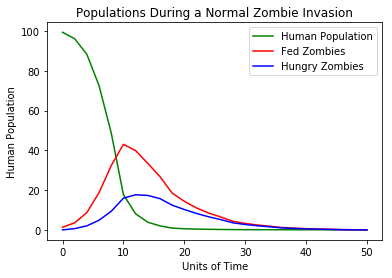

In [19]:
#makign the plots
plot(test_lengths,x_points,'g',test_lengths,y_points,'r',test_lengths,z_points,'b')
title("Populations During a Normal Zombie Invasion")
xlabel("Units of Time")
ylabel("Human Population")
legend(["Human Population","Fed Zombies","Hungry Zombies"])
show()

#Discuss teh results here

In a **nonstandard zombie invasion**, the human population is aware that decreased nutritional content of the brain by watching TV will result in the zombies nto surviving as long. To describe this, fed zombies go hungry sooner and hungry zombies die faster.

In [20]:
#the time
start_time=0
forward_time=50
increment_time=0.9


#the populations
hpop=100
fed=1
hungry=0

#the rates
h_BD=0 #rate of change of human population
fed_catch=0.008 #rate at which fed zombies catch humans
fed_conv=1.0 #fed zombies always convert a human when they catch a human
fed_dth=0 #fed zombies don't die
hungry_catch=0.003 #rate at which hungry zombies catch humans
hungry_conv_h=0 #hunrgy eat humans, no humans get converted
hungry_conv_f=0.30 #fed zombies become hungry zombies, higher conversion rate
hungry_dth=0.60 #hungry zombies die, higher death rate


#packaging nonstandard inputs
pack_x1=(h_BD,fed_catch,fed_conv,fed_dth,fed)
pack_x2=(h_BD,hungry_catch,hungry_conv_h,hungry_dth,hungry)
pack_y=(h_BD,catch,conv,fed_dth,hpop)
pack_z1=(hungry_conv_f)
pack_z2=(h_BD,catch,conv,hungry_dth,hpop)

#packing up all the packages into a medga package taht i can pass into the function
mega_pack=(pack_x1,pack_x2,pack_y,pack_z1,pack_z2)

In [21]:
#the time lengths we will be collecting data from
test_lengths=list(range(0,51,2))

#empty lists to store the data results in
x_points=[]
y_points=[]
z_points=[]

for i in test_lengths:
    forward_time=i
    results=zombie_attack(hpop,fed,hungry,start_time,forward_time,increment_time,mega_pack)
    #unpacking the results
    x_result,y_result,z_result=results
    #appending the results of each length of time
    x_points.append(x_result)
    y_points.append(y_result)
    z_points.append(z_result)

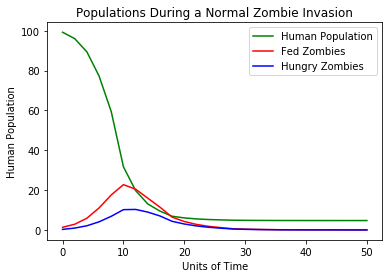

In [22]:
#plotting human population
plot(test_lengths,x_points,'g',test_lengths,y_points,'r',test_lengths,z_points,'b')
title("Populations During a Normal Zombie Invasion")
xlabel("Units of Time")
ylabel("Human Population")
legend(["Human Population","Fed Zombies","Hungry Zombies"])
show()